In [123]:
%%capture

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams.update({'font.size': 14})
plt.tight_layout()

In [128]:
import os
SCDIR = '../data/scorecard/' # scorecard data directory

# Data Exploration

_TODO: find out when IPEDS survey is taken, then adjust for inflation with [CPI's](https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/)

_TODO: cut scorecard data to include only Ivy League's and elite universities._

Let's take a look at Columbia's net price since 2009 (when colleges began reporting student aid data).

In [127]:
scorecards = []

for year in range(9, 17):
    fname = f'MERGED20{year:02}_{(year + 1):02}_PP.csv'
    scorecards.append(pandas.read_csv(SCDIR + fname, low_memory=True))
    print('Finished reading', fname)

Finished reading MERGED2009_10_PP.csv
Finished reading MERGED2010_11_PP.csv
Finished reading MERGED2011_12_PP.csv
Finished reading MERGED2012_13_PP.csv
Finished reading MERGED2013_14_PP.csv
Finished reading MERGED2014_15_PP.csv
Finished reading MERGED2015_16_PP.csv
Finished reading MERGED2016_17_PP.csv


In [129]:
rows = [s.set_index('INSTNM').loc['Columbia University in the City of New York'] for s in scorecards]

In [175]:
colNames = {
    'NPT41_PRIV': 'price for 0-30,000 fam income',
    'NPT42_PRIV': 'price for 30,001-48,000 fam income',
    'NPT43_PRIV': 'price for 48,001-75,000 fam income',
    'NPT44_PRIV': 'price for 75,001-110,000 fam income',
    'NPT45_PRIV': 'price for 110,000+ fam income',
}

YEARS = [i for i in range(2009, 2017)]

In [166]:
# Retrieves column data for every year
def getColumnData(col):
    return [row[col] for row in rows]

def comparePriceLines(*cols, title=None):
    plt.figure(figsize=(10,10))
    for col in cols:
        plt.plot(YEARS, getColumnData(col), label=colNames.get(col, col))        
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Price (in nominal dollars)')
    if title:
        plt.title(title)

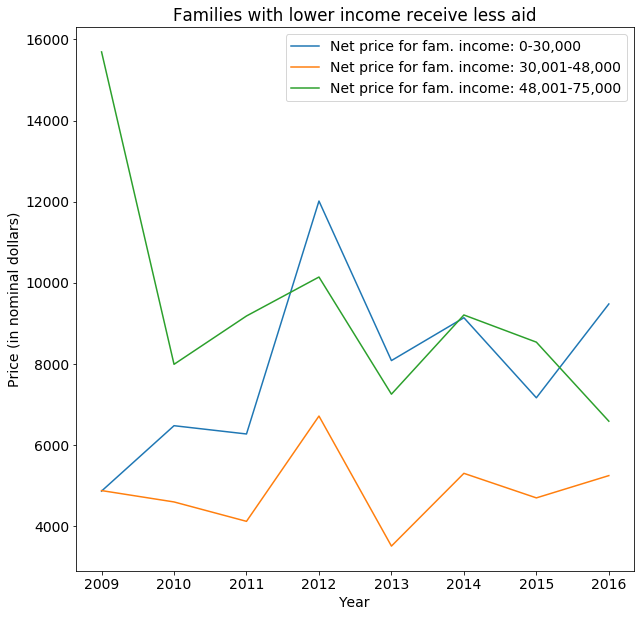

In [167]:
comparePriceLines('NPT41_PRIV', 'NPT42_PRIV', 'NPT43_PRIV', title="In the past decade,  with lower income receive less aid")

In [176]:
# Retrieves percent increase column data for every year
def getColumnData(col):
    return [None] + [
        (rows[i][col] - rows[i-1][col]) / rows[i-1][col]
        for i in range(1, len(rows))
    ]

def comparePriceIncreases(*cols, title=None):
    plt.figure(figsize=(10,10))
    for col in cols:
        plt.plot(YEARS, getColumnData(col), label=f'{colNames.get(col, col)}')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Percent Increase (not adjusted for inflation)')
    plt.axhline(y=0, linestyle='--', color='#aaaaaa')
    plt.ylim(top=1,bottom=-1)
    if title:
        plt.title(title)    

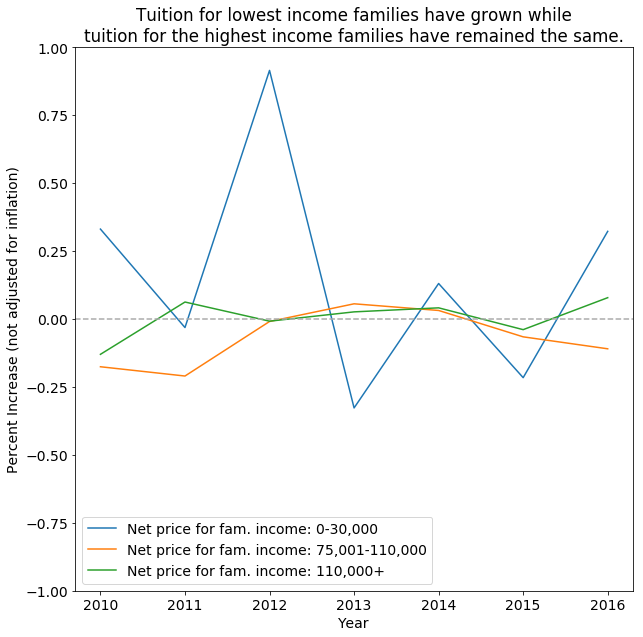

In [164]:
comparePriceIncreases('NPT41_PRIV', 'NPT44_PRIV', 'NPT45_PRIV', title="Tuition for lowest income families have grown while\ntuition for the highest income families have remained the same.")

In [173]:
# Retrieves percent increase column data since 2009 for every year
def getColumnData(col):
    ogData = rows[0][col]
    return [None] + [
        (rows[i][col] - ogData) / ogData
        for i in range(1, len(rows))
    ]

def compareAggregatePriceIncreases(*cols, title=None):
    plt.figure(figsize=(10,10))
    for col in cols:
        plt.plot(YEARS, getColumnData(col), label=colNames.get(col, col))
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Percent increase since 2009 (not adjusted for inflation)')
    plt.axhline(y=0, linestyle='--', color='#aaaaaa')
    plt.ylim(top=2,bottom=-1)
    if title:
        plt.title(title)    

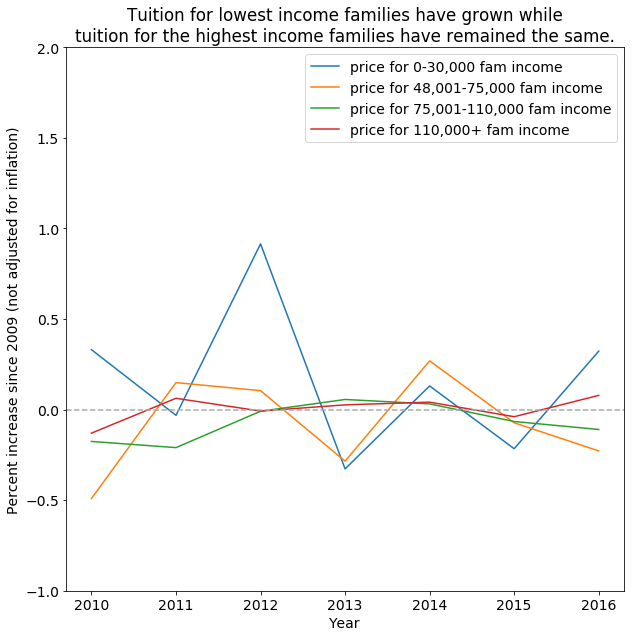

In [177]:
compareAggregatePriceIncreases('NPT41_PRIV', 'NPT43_PRIV','NPT44_PRIV', 'NPT45_PRIV', title="Tuition for lowest income families have grown while\ntuition for the highest income families have remained the same.")